In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_usage = pd.read_csv('internet_data.csv')
internet_usage.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [6]:
telecom = pd.merge(df_1, internet_usage, how='inner', on='customerID')

In [7]:
#Inspecting DataFrame
telecom.shape

(7043, 21)

In [8]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [10]:
# Data Preparation
varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})


telecom[varlist] = telecom[varlist].apply(binary_map)

In [11]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [12]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [13]:
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)
telecom = pd.concat([telecom, dummy1], axis=1)

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [15]:
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
telecom = pd.concat([telecom, ml1], axis=1)

In [16]:
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
telecom = pd.concat([telecom, os1], axis=1)

In [17]:
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
telecom = pd.concat([telecom, ob1], axis=1)

In [18]:
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
telecom = pd.concat([telecom, dp1], axis=1)

In [19]:
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
telecom = pd.concat([telecom, ts1], axis=1)

In [20]:
st = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
telecom = pd.concat([telecom, st1], axis=1)

In [21]:
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
telecom = pd.concat([telecom, sm1], axis=1)

In [22]:
# Drop Repeated Variables
telecom.drop(columns=['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'TechSupport', 'StreamingTV', 'StreamingMovies'], inplace=True)

In [23]:
telecom['OnlineBackup'].astype('category').value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [24]:
telecom['MultipleLines_No'].astype('category').value_counts()

0    3653
1    3390
Name: MultipleLines_No, dtype: int64

In [25]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  OnlineSecurity                         7043 non-null   object 
 11  Onli

In [26]:
#Checking Outliers

In [27]:
num_telecom = telecom[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']]

In [28]:
num_telecom.describe(percentiles=[.25, .5, .75, .9, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [29]:
#Check Missing Values
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes               

In [30]:
#Drop NaN
telecom.dropna(inplace=True)

In [31]:
telecom

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.50,0,0,1,1,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.90,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,1,74.40,306.60,1,1,1,0,...,1,0,1,0,1,0,1,0,1,0


In [32]:
telecom.drop(columns=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection'], inplace=True)

In [33]:
#train test split
from sklearn.model_selection import train_test_split

In [34]:
X = telecom.drop(['Churn', 'customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [35]:
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [37]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [38]:
scalar = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scalar.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
3946,-0.952316,0,0,-0.202600,-0.767315,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,1
3394,-0.262207,1,0,-0.101327,-0.306559,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1635,-1.195884,1,1,0.177587,-0.908535,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,1
4088,-1.033505,1,0,0.298782,-0.776092,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1886,1.402172,1,1,-0.139512,0.742090,0,1,1,0,1,...,1,0,0,1,0,1,1,0,1,0


In [39]:
#Checking Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

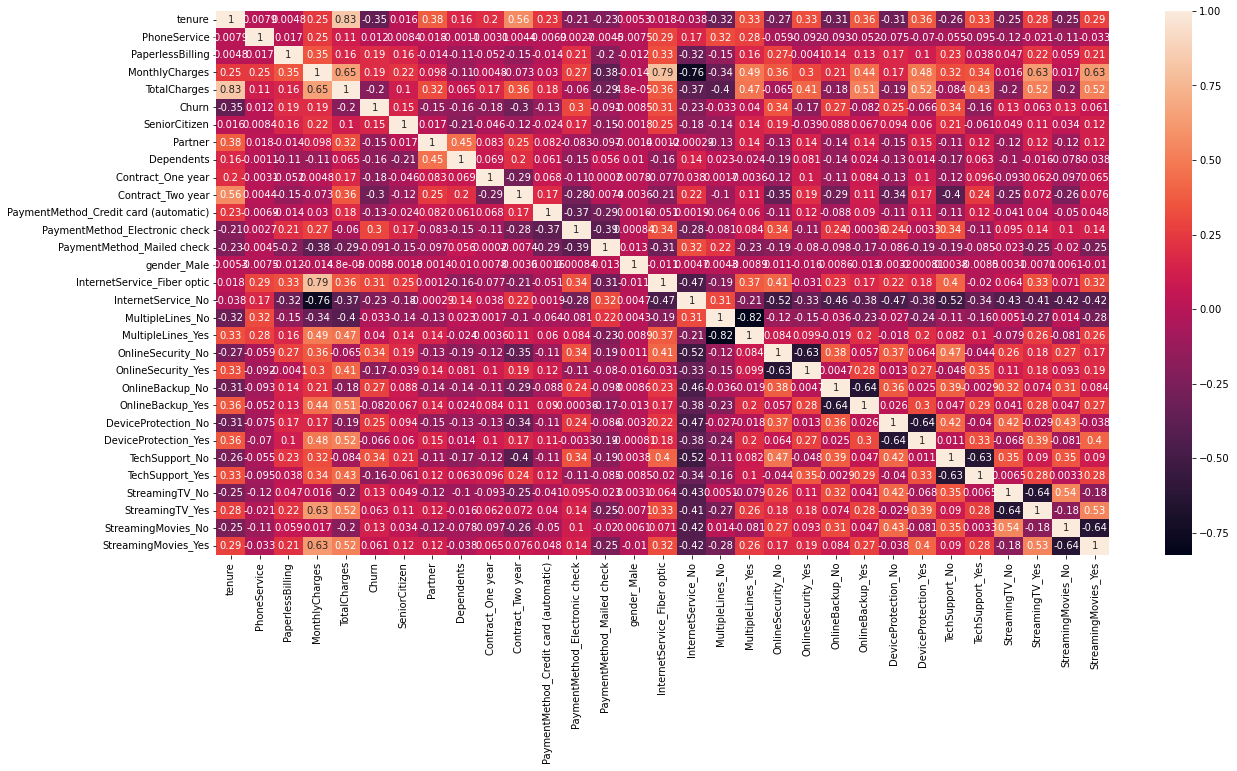

In [40]:
#Looking at correlation
plt.figure(figsize=(20, 10))
sns.heatmap(telecom.corr(), annot=True)
plt.show()

In [41]:
import statsmodels.api as sm

In [42]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.1
Date:                Wed, 21 Sep 2022   Deviance:                       4042.2
Time:                        07:30:34   Pearson chi2:                 5.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2859
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.6478      1.178     -2.247      0.025      -4.957      -0.338
tenure                                   -1.5221      0.187     -8.128      0.000      -1.889      -1.155
PhoneService                              0.5240      0.586      0.895      0.371      -0.624       1.672
PaperlessBilling                          0.2066      0.089      2.327      0.020       0.033       0.381
MonthlyCharges                           -1.6782      1.157     -1.450      0.147      -3.946       0.590
TotalCharges                              0.7688      0.194      3.956      0.000       0.388       1.150
SeniorCitizen                             0.2268      0.101      2.235      0.025       0.028       0.426
Partner                                   0.1332      0.094      1.420      0.155      -0.051       0.317
Dependents                               -0.2451      0.109     -2.240      0.025      -0.460      -0.031
Contract_One year                        -0.8185      0.133     -6.177      0.000      -1.078      -0.559
Contract_Two year                        -1.4284      0.209     -6.823      0.000      -1.839      -1.018
PaymentMethod_Credit card (automatic)    -0.1625      0.137     -1.186      0.236      -0.431       0.106
PaymentMethod_Electronic check            0.2029      0.113      1.790      0.073      -0.019       0.425
PaymentMethod_Mailed check               -0.1224      0.138     -0.886      0.376      -0.393       0.148
gender_Male                              -0.0202      0.078     -0.259      0.796      -0.173       0.133
InternetService_Fiber optic               2.1963      0.965      2.275      0.023       0.304       4.088
InternetService_No                       -2.7357      1.316     -2.079      0.038      -5.314      -0.157
MultipleLines_No                          0.0295      0.203      0.145      0.885      -0.369       0.428
MultipleLines_Yes                         0.4945      0.391      1.264      0.206      -0.272       1.261
OnlineSecurity_No                         0.1097      0.057      1.910      0.056      -0.003       0.222
OnlineSecurity_Yes                       -0.0217      0.173     -0.125      0.900      -0.362       0.318
OnlineBackup_No                          -0.0410      0.054     -0.758      0.448      -0.147       0.065
OnlineBackup_Yes                          0.1290      0.172      0.748      0.454      -0.209       0.467
DeviceProtection_No                      -0.0701      0.055     -1.275      0.202      -0.178       0.038
DeviceProtection_Yes                      0.1581      0.172      0.919      0.358      -0.179       0.495
TechSupport_No                            0.0940      0.059      1.597      0.110      -0.021       0.209
TechSuppo

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [45]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
        True, False,  True])

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 8),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 5),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 6),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 7),
 ('gender_Male', False, 15),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', False, 16),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', False, 9),
 ('OnlineBackup_No', False, 11),
 ('OnlineBackup_Yes', False, 12),
 ('DeviceProtection_No', False, 4),
 ('DeviceProtection_Yes', False, 3),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 10),
 ('StreamingTV_No', False, 14),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No', False, 13),
 ('StreamingMovies_Yes', Tr

In [47]:
col = X_train.columns[rfe.support_]

In [48]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingMovies_No'],
      dtype='object')

In [49]:
#Assesing the model with StatsModels

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.3
Date:                Wed, 21 Sep 2022   Deviance:                       4050.7
Time:                        07:30:35   Pearson chi2:                 5.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2847
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.3948      0.167    -14.364      0.000      -2.722      -2.068
tenure                            -1.5087      0.184     -8.211      0.000      -1.869      -1.149
PaperlessBilling                   0.2138      0.088      2.417      0.016       0.040       0.387
MonthlyCharges                    -0.4959      0.188     -2.633      0.008      -0.865      -0.127
TotalCharges                       0.7740      0.192      4.026      0.000       0.397       1.151
SeniorCitizen                      0.2724      0.100      2.737      0.006       0.077       0.467
Contract_One year                 -0.8347      0.131     -6.349      0.000      -1.092      -0.577
Contract_Two year                 -1.4476      0.208     -6.958      0.000      -1.855      -1.040
PaymentMethod_Electronic check     0.3012      0.083      3.634      0.000       0.139       0.464
InternetService_Fiber optic        1.2448      0.221      5.635      0.000       0.812       1.678
InternetService_No                -0.5474      0.268     -2.040      0.041      -1.073      -0.021
MultipleLines_No                  -0.2672      0.087     -3.076      0.002      -0.437      -0.097
OnlineSecurity_No                  0.3243      0.107      3.034      0.002       0.115       0.534
TechSupport_No                     0.2929      0.109      2.697      0.007       0.080       0.506
StreamingTV_Yes                    0.3751      0.112      3.341      0.001       0.155       0.595
StreamingMovies_Yes                0.3816      0.111      3.425      0.001       0.163       0.600
==================================================================================================
"""

In [51]:
#Getting the predicted values on the train set

In [52]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3946    0.332961
3394    0.081147
1635    0.355495
4088    0.640779
1886    0.004643
5149    0.002735
1617    0.171182
981     0.007543
3080    0.496496
4992    0.084274
dtype: float64

In [53]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33296073, 0.08114697, 0.35549507, 0.64077877, 0.00464347,
       0.0027351 , 0.17118222, 0.00754319, 0.49649647, 0.08427404])

In [54]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.332961,3946
1,0,0.081147,3394
2,0,0.355495,1635
3,1,0.640779,4088
4,0,0.004643,1886


In [62]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.332961,3946,1
1,0,0.081147,3394,0
2,0,0.355495,1635,1
3,1,0.640779,4088,1
4,0,0.004643,1886,0


In [56]:
from sklearn import metrics

In [63]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[2763  851]
 [ 298 1010]]


In [58]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8041446566436408


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values('VIF', ascending=False)
vif

,Features,VIF
2,MonthlyCharges,19.99
8,InternetService_Fiber optic,11.51
3,TotalCharges,9.97
9,InternetService_No,8.53
0,tenure,6.79
11,OnlineSecurity_No,3.68
12,TechSupport_No,3.63
13,StreamingTV_Yes,3.21
14,StreamingMovies_Yes,3.17
6,Contract_Two year,2.77


In [ ]:
from sklearn.metrics import accuracy_score, 